In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
mostRecentDate = session.query(func.max(measurement.date)).scalar()
mostRecentDate

'2017-08-23'

In [19]:
# Find the earliest date in data set
earliestDate = session.query(func.min(measurement.date)).scalar()
earliestDate

'2010-01-01'

2016-08-23 00:00:00


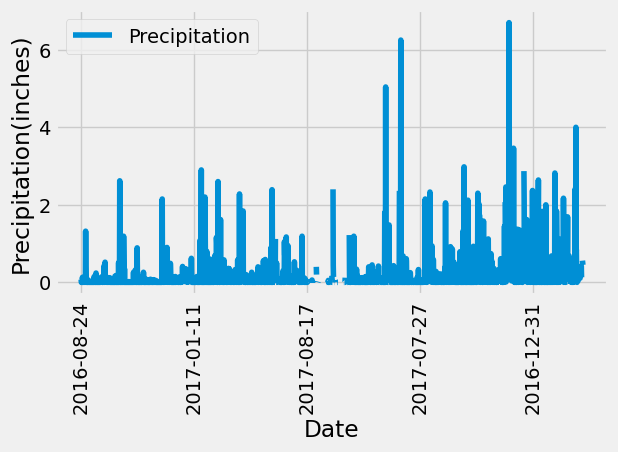

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oneYearAgo = dt.datetime.strptime(mostRecentDate, "%Y-%m-%d") - dt.timedelta(days=365)
print(oneYearAgo)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= oneYearAgo).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(scores, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
results_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation(inches)')
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df['Precipitation'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
totalStations = session.query(func.count(station.station)).scalar()
totalStations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

for station, count in stations:
    print(f"Station: {station}, total number: {count}")


Station: USC00519281, total number: 2772
Station: USC00519397, total number: 2724
Station: USC00513117, total number: 2709
Station: USC00519523, total number: 2669
Station: USC00516128, total number: 2612
Station: USC00514830, total number: 2202
Station: USC00511918, total number: 1979
Station: USC00517948, total number: 1372
Station: USC00518838, total number: 511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

print(temperature)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [16]:
# Using the most active station id
mostActiveStation = session.query(measurement.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

mostActiveStationID = mostActiveStation[0]

# Query the last 12 months of temperature observation data for this station 
tempObsData = session.query(measurement.tobs).\
    filter(measurement.station == mostActiveStationID).\
    filter(measurement.date >= oneYearAgo).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temperaturedf = pd.DataFrame(tempObsData, columns=['tobs'])
temperaturedf

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


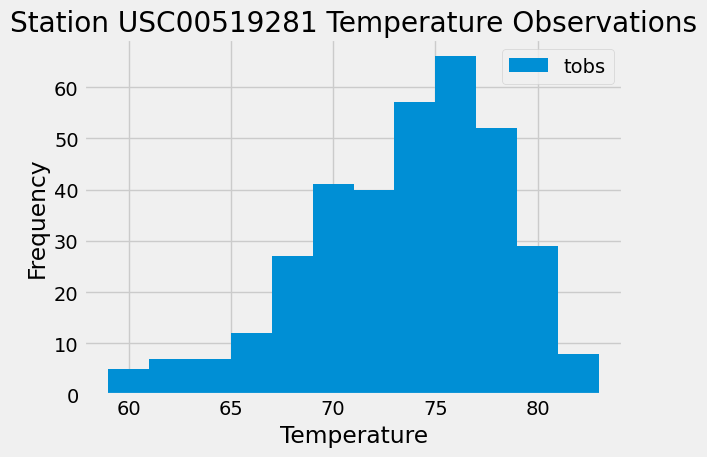

In [17]:
#Plot the results as a histogram
plt.hist (temperaturedf, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Station USC00519281 Temperature Observations')
plt.legend()
plt.tight_layout()
plt.show()

# Close Session

In [18]:
# Close Session
session.close()